In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/spam.csv'
data = pd.read_csv(file_path, encoding='latin-1')


In [ ]:
# Clean the dataset
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [ ]:
# Map labels to binary values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [ ]:
# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
label      0
message    0
dtype: int64


In [ ]:
# Basic statistics
print("\nDataset Information:")
print(data.info())
print("\nDataset Description:")
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None

Dataset Description:
             label
count  5572.000000
mean      0.134063
std       0.340751
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


<ipython-input-41-1ab05cc02537>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette='viridis')


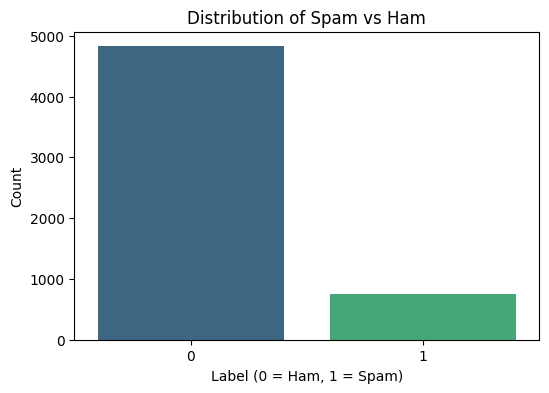

In [ ]:
# Distribution of spam vs. ham messages
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='label', palette='viridis')
plt.title('Distribution of Spam vs Ham')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Length analysis of messages
data['message_length'] = data['message'].apply(len)

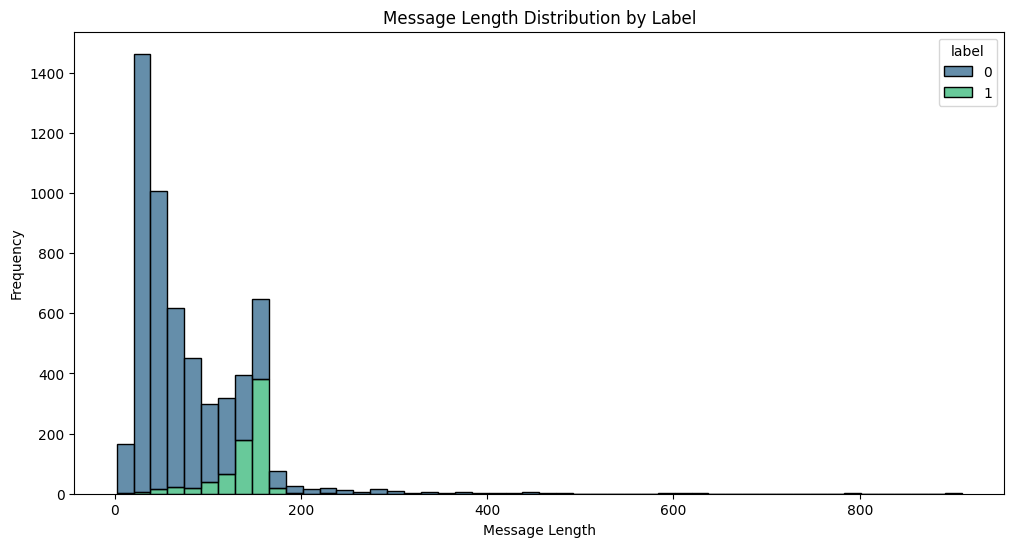

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='message_length', hue='label', multiple='stack', palette='viridis', bins=50)
plt.title('Message Length Distribution by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

<ipython-input-44-38af200343bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='message_length', data=data, palette='viridis')


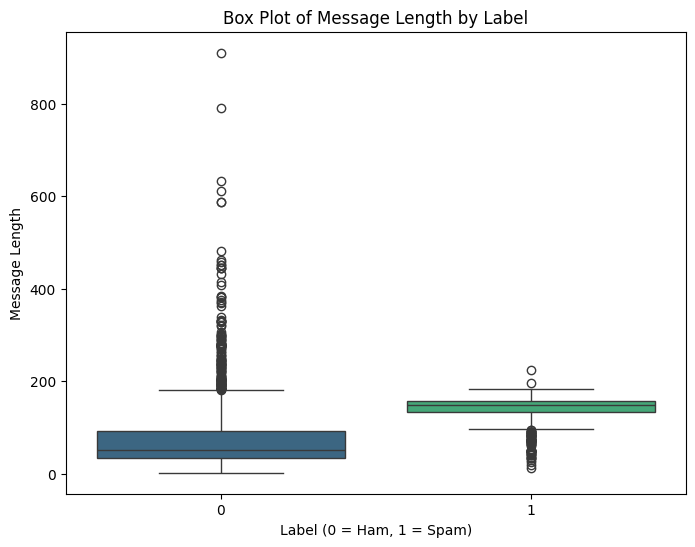

In [ ]:
# Box plot for message lengths
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='message_length', data=data, palette='viridis')
plt.title('Box Plot of Message Length by Label')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Message Length')
plt.show()

In [ ]:
# Word cloud visualization
spam_words = ' '.join(list(data[data['label'] == 1]['message']))
ham_words = ' '.join(list(data[data['label'] == 0]['message']))


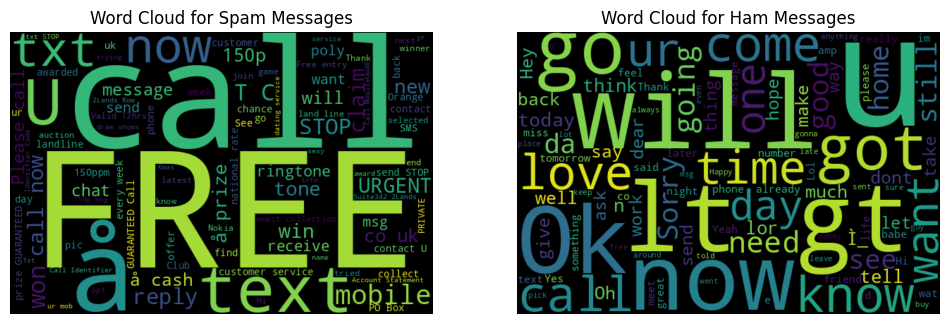

In [ ]:
spam_wordcloud = WordCloud(width=600, height=400, max_words=100).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400, max_words=100).generate(ham_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

In [ ]:
# Most common words in spam messages
spam_words_counter = Counter(spam_words.split())
ham_words_counter = Counter(ham_words.split())

In [ ]:
print("\nMost common words in spam messages:")
print(spam_words_counter.most_common(10))



Most common words in spam messages:
[('to', 604), ('a', 358), ('your', 187), ('call', 185), ('or', 185), ('the', 178), ('2', 169), ('for', 169), ('you', 164), ('is', 143)]


In [ ]:
print("\nMost common words in ham messages:")
print(ham_words_counter.most_common(10))


Most common words in ham messages:
[('to', 1530), ('you', 1458), ('I', 1436), ('the', 1019), ('a', 969), ('and', 738), ('i', 736), ('in', 734), ('u', 645), ('is', 638)]


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

In [ ]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Initialize classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svm_classifier = SVC(kernel='linear')


In [ ]:
# Train and evaluate Naive Bayes classifier
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)
print("Naive Bayes Classifier:\n", nb_report)


Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
# Train and evaluate Logistic Regression classifier
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)
print("Logistic Regression Classifier:\n", lr_report)


Logistic Regression Classifier:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [ ]:
# Train and evaluate SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)
print("SVM Classifier:\n", svm_report)


SVM Classifier:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# Output the accuracy scores
print(f"Naive Bayes Accuracy: {nb_accuracy:.2%}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.2%}")
print(f"SVM Accuracy: {svm_accuracy:.2%}")

Naive Bayes Accuracy: 96.23%
Logistic Regression Accuracy: 96.59%
SVM Accuracy: 98.30%


In [ ]:
# Distribution of TF-IDF feature importance for Naive Bayes
feature_names = vectorizer.get_feature_names_out()
spam_class_index = 1
top_n = 10


In [ ]:
# Get the log probability of each feature given each class
log_prob = nb_classifier.feature_log_prob_

In [ ]:
# Get the top features for spam class
top_features = sorted(zip(log_prob[spam_class_index], feature_names), reverse=True)[:top_n]


In [ ]:
top_feature_values = [item[0] for item in top_features]
top_feature_names = [item[1] for item in top_features]

<ipython-input-63-b26aab14aeaf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_values, y=top_feature_names, palette='viridis')


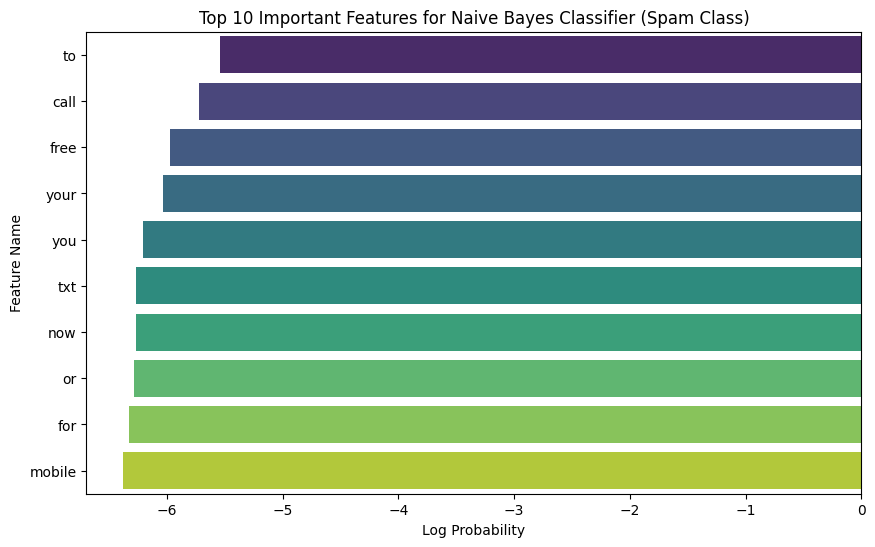

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_values, y=top_feature_names, palette='viridis')
plt.title('Top 10 Important Features for Naive Bayes Classifier (Spam Class)')
plt.xlabel('Log Probability')
plt.ylabel('Feature Name')
plt.show()